<a href="https://colab.research.google.com/github/shivm1908/NEUR-3002/blob/main/ica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

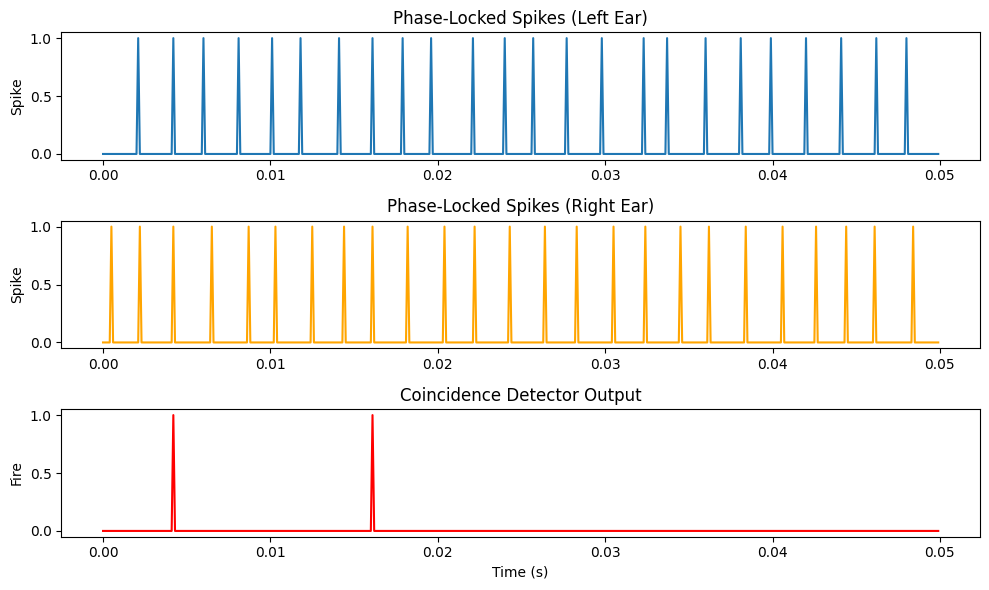

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parameters
# -----------------------------
duration = 0.05          # seconds
dt = 0.0001              # time step (s)
time = np.arange(0, duration, dt)

frequency = 500          # Hz (low freq → phase locking works)
itd = 0.0004             # interaural time difference (seconds)

threshold = 1.5          # coincidence detector threshold

# -----------------------------
# Generate phase-locked spikes
# -----------------------------
def phase_locked_spikes(freq, time, jitter=0.0002):
    period = 1 / freq
    spike_times = np.arange(0, time[-1], period)
    spike_times += np.random.normal(0, jitter, len(spike_times))
    spike_times = spike_times[spike_times > 0]

    spikes = np.zeros(len(time))
    indices = (spike_times / dt).astype(int)
    indices = indices[indices < len(time)]
    spikes[indices] = 1
    return spikes

left_spikes = phase_locked_spikes(frequency, time)
right_spikes = phase_locked_spikes(frequency, time)

# Apply ITD to right ear
shift = int(itd / dt)
right_spikes = np.roll(right_spikes, shift)

# -----------------------------
# Coincidence Detector with Refractory Period
# -----------------------------
coincidence_output = np.zeros(len(time))
refractory_period = 0.001  # 1 ms refractory period
last_spike_time = -np.inf

for i, t in enumerate(time):
    if (left_spikes[i] + right_spikes[i] >= threshold) and (t - last_spike_time > refractory_period):
        coincidence_output[i] = 1
        last_spike_time = t

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(time, left_spikes, label="Left Ear")
plt.title("Phase-Locked Spikes (Left Ear)")
plt.ylabel("Spike")

plt.subplot(3, 1, 2)
plt.plot(time, right_spikes, label="Right Ear", color="orange")
plt.title("Phase-Locked Spikes (Right Ear)")
plt.ylabel("Spike")

plt.subplot(3, 1, 3)
plt.plot(time, coincidence_output.astype(int), color="red")
plt.title("Coincidence Detector Output")
plt.xlabel("Time (s)")
plt.ylabel("Fire")

plt.tight_layout()
plt.show()


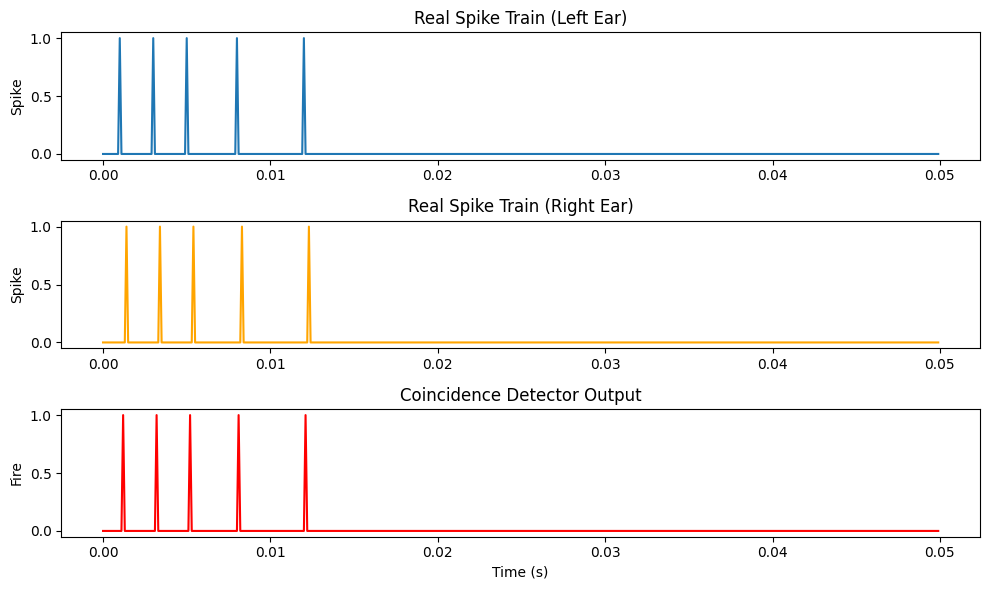

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parameters
# -----------------------------
duration = 0.05          # seconds
dt = 0.0001              # time step (s)
time = np.arange(0, duration, dt)

threshold = 1.5          # coincidence detector threshold (still used for clarity)
refractory_period = 0.001  # 1 ms refractory period
window = 2  # number of time steps for coincidence window

# -----------------------------
# Load real spike data
# -----------------------------
# Example: real spike times in seconds (replace with your data)
left_spike_times = np.array([0.001, 0.003, 0.005, 0.008, 0.012])
right_spike_times = np.array([0.0014, 0.0034, 0.0054, 0.0084, 0.0124])

# Convert spike times to binary spike train
def spike_times_to_train(spike_times, time, dt):
    spikes = np.zeros(len(time))
    indices = (spike_times / dt).astype(int)
    indices = indices[indices < len(time)]
    spikes[indices] = 1
    return spikes

left_spikes = spike_times_to_train(left_spike_times, time, dt)
right_spikes = spike_times_to_train(right_spike_times, time, dt)

# -----------------------------
# Coincidence Detector with Refractory Period & Time Window
# -----------------------------
coincidence_output = np.zeros(len(time))
last_spike_time = -np.inf

for i, t in enumerate(time):
    # Check for spikes within a small time window
    left_window = left_spikes[max(0, i-window):i+window+1]
    right_window = right_spikes[max(0, i-window):i+window+1]

    if (np.any(left_window) and np.any(right_window) and (t - last_spike_time > refractory_period)):
        coincidence_output[i] = 1
        last_spike_time = t

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(time, left_spikes, label="Left Ear")
plt.title("Real Spike Train (Left Ear)")
plt.ylabel("Spike")

plt.subplot(3, 1, 2)
plt.plot(time, right_spikes, label="Right Ear", color="orange")
plt.title("Real Spike Train (Right Ear)")
plt.ylabel("Spike")

plt.subplot(3, 1, 3)
plt.plot(time, coincidence_output.astype(int), color="red")
plt.title("Coincidence Detector Output")
plt.xlabel("Time (s)")
plt.ylabel("Fire")

plt.tight_layout()
plt.show()
